In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

In [2]:
# Importing the dataset

dataset = pd.read_excel('Online Retail.xlsx')
dataset.shape
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
# Removing missing data

dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [4]:
# Data Exploration

# Quantity
dataset.sort_values("Quantity", ascending = False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom


In [5]:
dataset.sort_values("Quantity", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [6]:
#Quantity is negative may be due to discounts, damaged goods, thrown away etc. I shall remove these values.

In [7]:
mask = dataset["Quantity"] > 0

dataset = dataset [mask]
dataset.sort_values("Quantity", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
389620,570482,23380,PACK OF 12 VINTAGE DOILY TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,United Kingdom
132735,547689,21528,DAIRY MAID TRADITIONAL TEAPOT,1,2011-03-24 14:55:00,6.95,17757.0,United Kingdom
389621,570482,22615,PACK OF 12 CIRCUS PARADE TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,United Kingdom
389622,570482,23377,PACK OF 12 DOLLY GIRL TISSUES,1,2011-10-10 17:00:00,0.39,17459.0,United Kingdom
109150,545587,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2011-03-04 09:46:00,1.25,14796.0,United Kingdom


In [8]:

# For some customers, their information on country is unspecified, lets filter those out

mask = dataset["Country"] != "Unspecified"
dataset = dataset [mask]

In [9]:
# Creating new column - Revenue in $

dataset["Revenue"] = dataset["Quantity"]*dataset["UnitPrice"]
dataset.head(10).sort_values("Revenue", ascending = False).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
dataset.sort_values("Revenue", ascending = False).tail(5)

# Revenue is 0 for some quantities, as they may have been given away as promotional offers, I shll remove these as well

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0
485985,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom,0.0
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,0.0
454464,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,0.0
285657,561916,M,Manual,1,2011-08-01 11:44:00,0.0,15581.0,United Kingdom,0.0


In [11]:
mask = dataset["Revenue"] > 0

dataset = dataset [mask]
dataset.sort_values("Revenue", ascending = False).head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72


In [12]:
dataset.sort_values("Revenue", ascending = False).tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom,0.060
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001


In [13]:
# Encoding variables

dataset["StockCode"] = dataset["StockCode"].astype('object')
dataset["CustomerID"] = dataset["CustomerID"].astype('object')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397640 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397640 non-null  object        
 1   StockCode    397640 non-null  object        
 2   Description  397640 non-null  object        
 3   Quantity     397640 non-null  int64         
 4   InvoiceDate  397640 non-null  datetime64[ns]
 5   UnitPrice    397640 non-null  float64       
 6   CustomerID   397640 non-null  object        
 7   Country      397640 non-null  object        
 8   Revenue      397640 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.3+ MB


In [15]:
# Customer ID

print("Unique customers:")
dataset["CustomerID"].nunique()

Unique customers:


4334

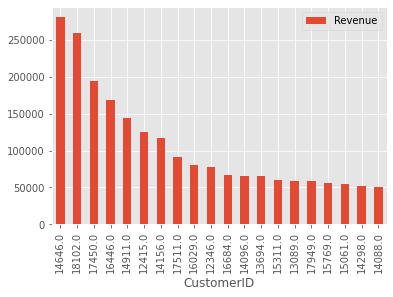

In [16]:
dataset.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False).head(20).plot(kind = "bar", )
                                
plt.show()

In [17]:
# Customer IDs of top segments

dataset1 = dataset[["CustomerID", "Revenue"]]

print("Top customer segment IDs")
dataset2 = dataset1.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)

dataset2.head(5)

Top customer segment IDs


,Revenue
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06


In [18]:
# Identifying the top 20 % customer segments driving 80 % $ sales

h = dataset1["CustomerID"].nunique()
i = round(0.25*h)
print("# of customers in top 25% power segment:", i, "out of", h)

j = dataset1.groupby("CustomerID").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False).head(i).sum()
k = dataset1["Revenue"].sum()

l = j/k*100
print("Total sales resulting from the top product segment:", round(list(l)[0]), "%")


# of customers in top 25% power segment: 1084 out of 4334
Total sales resulting from the top product segment: 79 %


In [19]:
#Analysis:
#1084 out of total 3877, top 25% of customer segments result in 79% of total $ sales amount.

In [20]:
#finding unique products

In [24]:
# Products

dataset1 = dataset[["Description", "Revenue"]]
print("Unique products:")
dataset1["Description"].nunique()


Unique products:


3877

In [25]:
#Unique products sold by the retailer is 3877.

3877


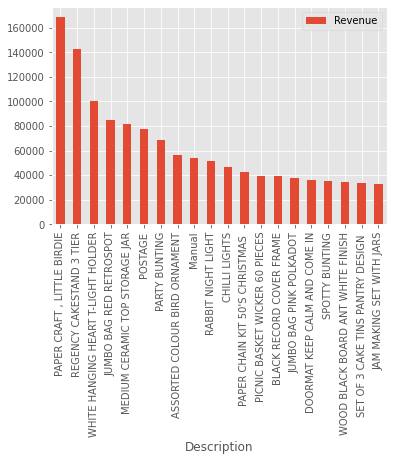

In [26]:
print(dataset1["Description"].nunique())
dataset2 = dataset1.groupby("Description").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)
dataset2.head(20).plot(kind = "bar")
plt.show()

Countries:
Top 10 countries by $ sales:


<AxesSubplot:xlabel='Country'>

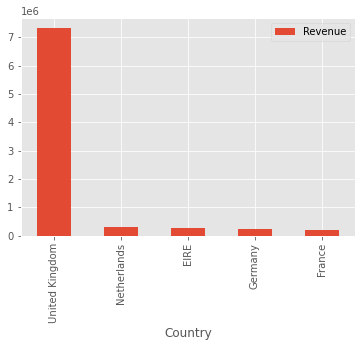

In [28]:
# Segmenting sales by geographic location

dataset1 = dataset[["Country", "Revenue"]]

print("Countries:")
dataset1["Country"].nunique()
print("Top 10 countries by $ sales:")
dataset2 = dataset1.groupby("Country").agg({"Revenue": "sum"}).sort_values("Revenue", ascending = False)
dataset2.head(5).plot(kind = "bar")

